## Tải dữ liệu

In [47]:
library(tidyverse) ##tidyverse for easy data manipulation and visualization
library(caret) ## caret for easy machine learning workflow
library(plot3D)

In [1]:
# Tải dữ liệu
wine <- read.table(file = "./data/wine.csv", header = TRUE, sep = ",")
head(wine)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,1952,7.4950,600,17.1167,160,31,43183.57
2,1953,8.0393,690,16.7333,80,30,43495.03
3,1955,7.6858,502,17.1500,130,28,44217.86
4,1957,6.9845,420,16.1333,110,26,45152.25
5,1958,6.7772,582,16.4167,187,25,45653.81
6,1959,8.0757,485,17.4833,187,24,46128.64


In [2]:
# Kích thước của dữ liệu
dim(wine)

[1] 27  7

In [3]:
# Xem một số quan trắc
str(wine)

'data.frame':	27 obs. of  7 variables:
 $ Year       : int  1952 1953 1955 1957 1958 1959 1960 1961 1962 1963 ...
 $ Price      : num  7.5 8.04 7.69 6.98 6.78 ...
 $ WinterRain : int  600 690 502 420 582 485 763 830 697 608 ...
 $ AGST       : num  17.1 16.7 17.1 16.1 16.4 ...
 $ HarvestRain: int  160 80 130 110 187 187 290 38 52 155 ...
 $ Age        : int  31 30 28 26 25 24 23 22 21 20 ...
 $ FrancePop  : num  43184 43495 44218 45152 45654 ...


In [4]:
# Kiểm tra dữ liệu trùng lặp
duplicates <- wine[duplicated(wine), ]
duplicate_counts <- table(wine[duplicated(wine), ])
duplicates # Không có dữ liệu trùng lặp

Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>


In [5]:
# Một số thống kê mô tả cho bộ dữ liệu
summary(wine)

      Year          Price         WinterRain         AGST        HarvestRain   
 Min.   :1952   Min.   :6.205   Min.   :376.0   Min.   :14.98   Min.   : 38.0  
 1st Qu.:1960   1st Qu.:6.508   1st Qu.:543.5   1st Qu.:16.15   1st Qu.: 88.0  
 Median :1967   Median :6.984   Median :600.0   Median :16.42   Median :123.0  
 Mean   :1967   Mean   :7.042   Mean   :608.4   Mean   :16.48   Mean   :144.8  
 3rd Qu.:1974   3rd Qu.:7.441   3rd Qu.:705.5   3rd Qu.:17.01   3rd Qu.:185.5  
 Max.   :1980   Max.   :8.494   Max.   :830.0   Max.   :17.65   Max.   :292.0  
      Age          FrancePop    
 Min.   : 3.00   Min.   :43184  
 1st Qu.: 9.50   1st Qu.:46856  
 Median :16.00   Median :50650  
 Mean   :16.19   Mean   :50085  
 3rd Qu.:22.50   3rd Qu.:53511  
 Max.   :31.00   Max.   :55110  

## Khám phá dữ liệu

In [29]:
correlation_matrix <- cor(wine)
correlation_matrix

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.00000000,-0.4604087,0.05118354,-0.29488335,-0.05884976,-1.00000000,0.99227908
Price,-0.46040873,1.0000000,0.13488004,0.66752483,-0.50718463,0.46040873,-0.48107195
WinterRain,0.05118354,0.1348800,1.00000000,-0.32113230,-0.26798907,-0.05118354,0.02945091
AGST,-0.29488335,0.6675248,-0.32113230,1.00000000,-0.02708361,0.29488335,-0.30126148
HarvestRain,-0.05884976,-0.5071846,-0.26798907,-0.02708361,1.00000000,0.05884976,-0.03201463
Age,-1.00000000,0.4604087,-0.05118354,0.29488335,0.05884976,1.00000000,-0.99227908
FrancePop,0.99227908,-0.4810720,0.02945091,-0.30126148,-0.03201463,-0.99227908,1.00000000


In [7]:
round(cor(wine), 2)

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.00,-0.46,0.05,-0.29,-0.06,-1.00,0.99
Price,-0.46,1.00,0.13,0.67,-0.51,0.46,-0.48
WinterRain,0.05,0.13,1.00,-0.32,-0.27,-0.05,0.03
AGST,-0.29,0.67,-0.32,1.00,-0.03,0.29,-0.30
HarvestRain,-0.06,-0.51,-0.27,-0.03,1.00,0.06,-0.03
Age,-1.00,0.46,-0.05,0.29,0.06,1.00,-0.99
FrancePop,0.99,-0.48,0.03,-0.30,-0.03,-0.99,1.00


Một số nhận xét khi xem xét tương quan giữa các biến với biến phụ thuộc (Price):
- Biến Year có tương quan nghịch với biến Price (-0.46)
- Biến WinterRain có tương quan dương với biến Price, nhưng tác động không cao (0.13)
- Biến AGST có tương quan dương mạnh với biến Price, (0.67)
- Biến HarvestRain có tương quan nghịch và mạnh với biến Price (-0.51)
- Biến Age có tương quan dương với biến Price (0.46)
- Biến FrancePop có tương quan nghịch với biến Price (-0.48)

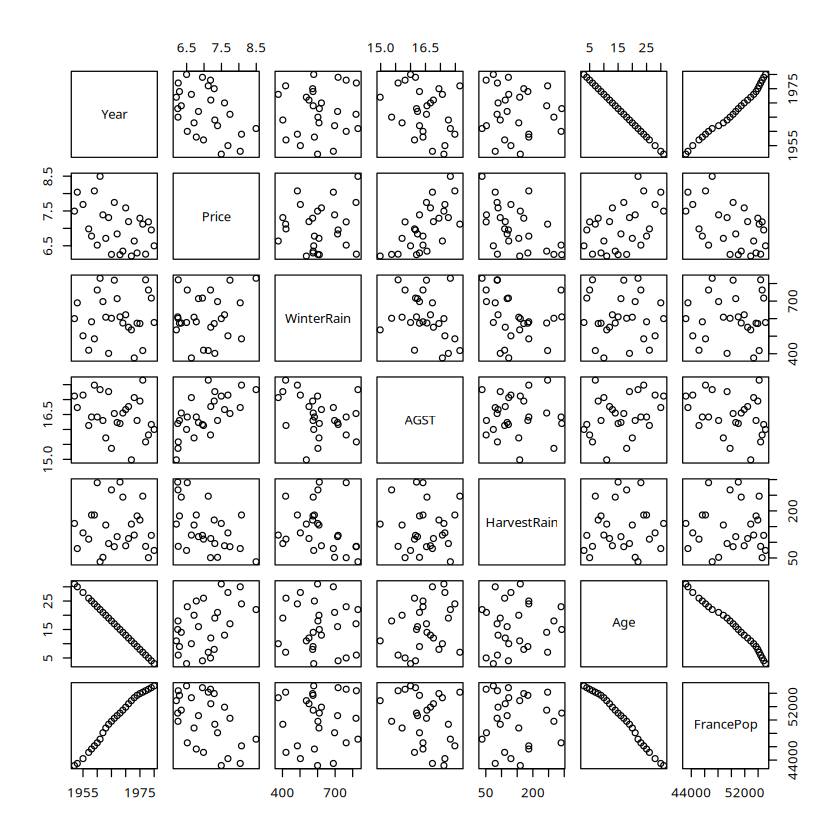

In [8]:
# Trực quan dữ liệu
plot(wine)

## Hồi quy tuyến tính đơn

In [9]:
# Do biến AGST có tương quan dương mạnh với biến Price, (0.67)
# Nên ta thử mô hình A: Price ~ AGST
model1 = lm(Price ~ AGST, data = wine)
model1


Call:
lm(formula = Price ~ AGST, data = wine)

Coefficients:
(Intercept)         AGST  
    -3.5469       0.6426  


In [10]:
summary(model1)


Call:
lm(formula = Price ~ AGST, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78370 -0.23827 -0.03421  0.29973  0.90198 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.5469     2.3641  -1.500 0.146052    
AGST          0.6426     0.1434   4.483 0.000143 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4819 on 25 degrees of freedom
Multiple R-squared:  0.4456,	Adjusted R-squared:  0.4234 
F-statistic: 20.09 on 1 and 25 DF,  p-value: 0.0001425


In [11]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
AGST,1,4.665461,4.6654615,20.09293,0.0001425042
Residuals,25,5.804854,0.2321941,NA,NA


## Hồi quy tuyến tính bội

In [12]:
model3 = lm(Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop, data = wine)
summary(model3)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain + Age + 
    FrancePop, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46541 -0.24133  0.00413  0.18974  0.52495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.343e+00  7.697e+00  -0.304  0.76384    
AGST         6.144e-01  9.799e-02   6.270 3.22e-06 ***
HarvestRain -3.837e-03  8.366e-04  -4.587  0.00016 ***
WinterRain   1.153e-03  4.991e-04   2.311  0.03109 *  
Age          1.377e-02  5.821e-02   0.237  0.81531    
FrancePop   -2.213e-05  1.268e-04  -0.175  0.86313    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.293 on 21 degrees of freedom
Multiple R-squared:  0.8278,	Adjusted R-squared:  0.7868 
F-statistic: 20.19 on 5 and 21 DF,  p-value: 2.232e-07


In [13]:
# Kiểm tra các hệ số thu được cho mô hình Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop + Year
coef(model3)

(Intercept)          AGST   HarvestRain    WinterRain           Age 
-2.342598e+00  6.144242e-01 -3.837313e-03  1.153219e-03  1.376935e-02 
    FrancePop 
-2.213392e-05

In [14]:
# Tính khoảng tin cậy cho các hệ số
confint(model3,level = 0.99)

,0.5 %,99.5 %
(Intercept),-2.413428e+01,19.4490823819
AGST,3.369668e-01,0.8918815205
HarvestRain,-6.206144e-03,-0.0014684820
WinterRain,-2.597717e-04,0.0025662098
Age,-1.510551e-01,0.1785938298
FrancePop,-3.812265e-04,0.0003369587


In [15]:
ls(model3)

[1] "assign"        "call"          "coefficients"  "df.residual"  
 [5] "effects"       "fitted.values" "model"         "qr"           
 [9] "rank"          "residuals"     "terms"         "xlevels"

In [16]:
model3$residuals

1            2            3            4            5            6 
-0.228305046  0.161453600  0.004131582 -0.006445171 -0.254350671  0.524946036 
           7            8            9           10           11           12 
-0.278112625  0.115148011 -0.113534301  0.096930505 -0.221446253  0.337512618 
          13           14           15           16           17           18 
 0.192222395 -0.261546354 -0.027489827 -0.260549946  0.284849755  0.023773852 
          19           20           21           22           23           24 
 0.348859657 -0.425744766 -0.269860201  0.300729861  0.187249312 -0.465414084 
          25           26           27 
 0.265946352  0.163435903 -0.194390193

In [17]:
SSE = sum(model3$residuals^2)
SSE

[1] 1.803182

Sử dụng kiểm định ANOVA (KD Fisher) để kiểm định ý nghĩa mô hình cho model3,
- H0: AGST = HarvestRain = WinterRain = Age = FrancePop = 0
- H1: Tồn tại ít nhất 1 biến cho cho hệ số của nó khác 0 

In [18]:
anova(model3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
AGST,1,4.665461453,4.665461453,54.33432803,2.981673e-07
HarvestRain,1,2.506592873,2.506592873,29.19197613,2.329489e-05
WinterRain,1,0.583560040,0.583560040,6.79618575,1.646343e-02
Age,1,0.908903355,0.908903355,10.58515938,3.800444e-03
FrancePop,1,0.002615254,0.002615254,0.03045746,8.631279e-01
Residuals,21,1.803182152,0.085865817,NA,NA


Ta thấy:
-  Biến WinterRain có ý nghĩa đối với mô hình về mặt thống kê (với mức ý nghĩa *)
-  Biến HarvestRain có ý nghĩa đối với mô hình về mặt thống kê (với mức ý nghĩa ***)
-  Biến AGST có ý nghĩa đối với mô hình về mặt thống kê (với mức ý nghĩa ***)
-  Biến Age không có ý nghĩa (có thể loại bỏ)
-  Biến FrancePop không có ý nghĩa (có thể loại bỏ)
-  Biến Year không có ý nghĩa (có thể loại bỏ)
-  Mô hình có thể giải thích được 82.78% sự thay đổi của biến Price
-  Mô hình tương đối tốt (p value = 2.232e-07)

In [19]:
model4 = lm(Price ~ AGST + HarvestRain + WinterRain, data = wine) # remove Age and FrancePop
summary(model4)


Call:
lm(formula = Price ~ AGST + HarvestRain + WinterRain, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62816 -0.17923  0.02274  0.21990  0.62859 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.9506001  1.9694011  -2.514  0.01940 *  
AGST         0.7123192  0.1087676   6.549 1.11e-06 ***
HarvestRain -0.0036242  0.0009646  -3.757  0.00103 ** 
WinterRain   0.0012820  0.0005765   2.224  0.03628 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3436 on 23 degrees of freedom
Multiple R-squared:  0.7407,	Adjusted R-squared:  0.7069 
F-statistic:  21.9 on 3 and 23 DF,  p-value: 6.246e-07


Ta nhận thấy
-  Mô hình có thể giải thích được 74.07% sự thay đổi của biến Price
-  Mô hình tương đối tốt (p value = 6.246e-07)

In [20]:
# Kiểm tra các hệ số thu được cho mô hình Price ~ AGST + HarvestRain + WinterRain
coef(model4)

(Intercept)         AGST  HarvestRain   WinterRain 
-4.950600148  0.712319187 -0.003624226  0.001281954

In [21]:
# Tính khoảng tin cậy cho các hệ số
confint(model4,level = 0.99)

,0.5 %,99.5 %
(Intercept),-1.047937e+01,0.5781698973
AGST,4.069720e-01,1.0176663823
HarvestRain,-6.332166e-03,-0.0009162869
WinterRain,-3.365771e-04,0.0029004843


In [22]:
ls(model4)

[1] "assign"        "call"          "coefficients"  "df.residual"  
 [5] "effects"       "fitted.values" "model"         "qr"           
 [9] "rank"          "residuals"     "terms"         "xlevels"

In [23]:
model4$residuals

1           2           3           4           5           6 
 0.06375039  0.47583962  0.24773482  0.30328540 -0.03449690  0.62859295 
          7           8           9          10          11          12 
-0.15163518  0.17115710  0.02273551  0.25032049 -0.20682117  0.45233729 
         13          14          15          16          17          18 
 0.17967680 -0.26054706 -0.06918826 -0.34519447  0.19207096 -0.09968504 
         19          20          21          22          23          24 
 0.36810872 -0.60587242 -0.43508630  0.05525519 -0.14140618 -0.62815965 
         25          26          27 
 0.07676621 -0.08815556 -0.42138327

In [24]:
SSE = sum(model4$residuals^2)
SSE

[1] 2.714701

## Lựa chọn mô hình

In [25]:
anova_result <- anova(model1, model3)
anova_result

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25,5.804854,NA,NA,NA,NA
2,21,1.803182,4,4.001672,11.65094,3.841028e-05


In [26]:
# Mức ý nghĩa alpha = 0.05
if (anova_result$`Pr(>F)`[2] > 0.05) {
  cat("Model {Price ~ AGST} is significantly better than Model {Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop}.\n")
} else {
  cat("Model {Price ~ AGST} is not significantly better than Model {Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop}.\n")
}

Model {Price ~ AGST} is not significantly better than Model {Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop}.


Ta cần xem xét model3 và model4 thì model nào tốt hơn.
- H0: Mô hình rút gọn (model4)
- H1: Mô hình đầy đủ (model3)

In [27]:
anova_result <- anova(model4, model3)
anova_result

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23,2.714701,NA,NA,NA,NA
2,21,1.803182,2,0.9115186,5.307808,0.01362496


In [28]:
# Mức ý nghĩa alpha = 0.05
if (anova_result$`Pr(>F)`[2] < 0.05) {
  cat("Model {Price ~ AGST + HarvestRain + WinterRain} is significantly better than Model {Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop}.\n")
} else {
  cat("Model {Price ~ AGST + HarvestRain + WinterRain} is not significantly better than Model {Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop}.\n")
}

Model {Price ~ AGST + HarvestRain + WinterRain} is significantly better than Model {Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop}.


In [41]:
predict(model3, newdata =wine , interval = "confidence", level=0.99)
predict(model4, newdata =wine , interval = "prediction", level=0.99)

,fit,lwr,upr
1,7.723305,7.376564,8.070047
2,7.877846,7.510676,8.245017
3,7.681668,7.315674,8.047663
4,6.990945,6.492280,7.489610
5,7.031551,6.718563,7.344538
6,7.550754,7.189570,7.911938
7,6.796913,6.283987,7.309838
8,8.378552,7.905203,8.851901
9,7.501534,7.181512,7.821557
10,6.615769,6.295544,6.935995


,fit,lwr,upr
1,7.431250,6.429024,8.433475
2,7.563460,6.558930,8.567990
3,7.438065,6.430118,8.446012
4,6.681215,5.623506,7.738923
5,6.811697,5.823238,7.800156
6,7.447107,6.414916,8.479298
7,6.670435,5.559269,7.781601
8,8.322543,7.213616,9.431470
9,7.365264,6.351187,8.379342
10,6.462380,5.453450,7.471309


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


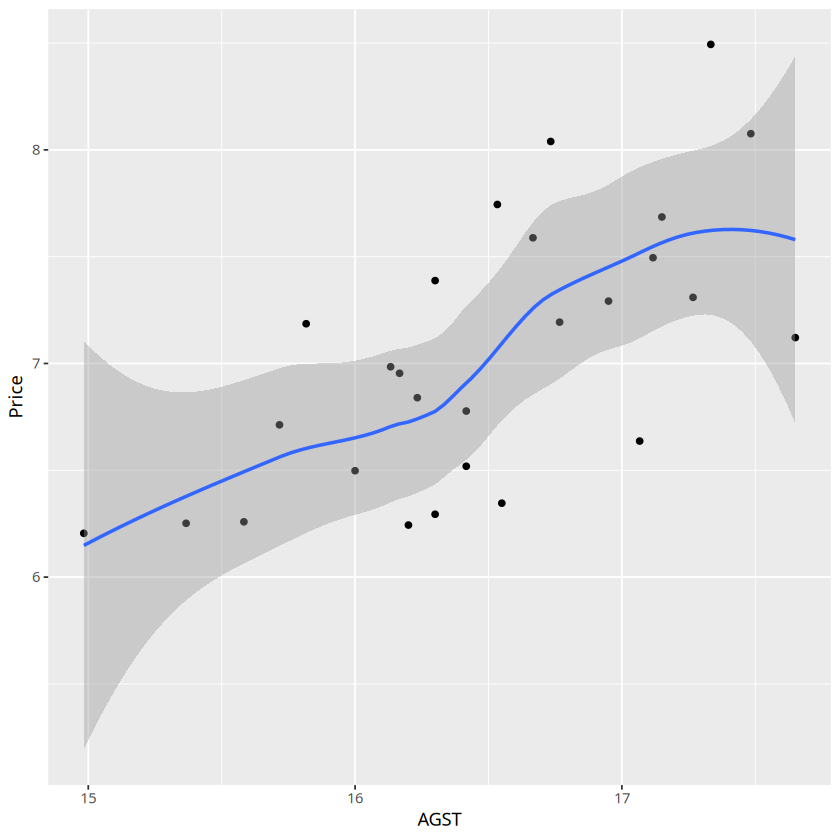

In [45]:
# Make predictions
predictions3 <- model3 %>% predict(wine)
predictions4 <- model4 %>% predict(wine)
# Model performance
# (a) Compute the prediction error, RMSE
ss3=RMSE(predictions3, wine$Price)
ss4=RMSE(predictions4, wine$Price)
# (b) Compute R-square
r2_3=R2(predictions3, wine$Price)
r2_4=R2(predictions4, wine$Price)
##scatter plot
ggplot(wine, aes(x = AGST, y = Price)) + geom_point() +stat_smooth()

In [60]:
# SSE cho model3
ss3

[1] 0.258427

In [59]:
# SSE cho model4
ss4

[1] 0.3170875

In [57]:
# R^2 cho model3
r2_3

[1] 0.8277815

In [56]:
# R^2 cho model4
r2_4

[1] 0.7407241

In [54]:
library(rgl)

# Create a 3D scatter plot
plot3d(wine$HarvestRain, wine$WinterRain, wine$Price, 
       xlab = "HarvestRain", ylab = "WinterRain", zlab = "Price", 
       col = "blue", type = "s", radius = 0.1)

# Fit a linear model to HarvestRain and WinterRain
model <- lm(Price ~ HarvestRain + WinterRain, data = wine)

# Extract coefficients
coef <- coef(model)

# Define the hyperplane equation: ax + by + cz + d = 0
a <- coef["HarvestRain"]
b <- coef["WinterRain"]
c <- 1  # Coefficient for the z-axis (Price)
d <- -coef["(Intercept)"]

# Create a grid of points
x <- seq(min(wine$HarvestRain), max(wine$HarvestRain), length.out = 20)
y <- seq(min(wine$WinterRain), max(wine$WinterRain), length.out = 20)
grid <- expand.grid(x, y)

# Compute z values for the hyperplane
z <- (-a * grid[,1] - b * grid[,2] - d) / c

# Add the hyperplane to the plot
planes3d(a = a, b = b, c = c, d = d, alpha = 0.5, col = "red")